In [5]:
# !pip install --upgrade --user ipykernel uproot4 awkward1 particle boost-histogram matplotlib mplhep pandas numexpr autograd hist hist[plot] humanize
# !pip install --upgrade --user uncertainties

In [6]:
import uproot4
from hist import Hist
import hist
import awkward1 as ak
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append("../")

from efficiency_fit import build_eff_plot

%matplotlib inline

# Pretty printing arrays
from pprint import pprint

In [7]:
input_data = [
(1.0, "/mnt/work/calo_data/QGSP_BERT_HP_1000evt_gamma_1x_31y_0z_1.0GeV.root"),
(1.5, "/mnt/work/calo_data/QGSP_BERT_HP_1000evt_gamma_1x_31y_0z_1.5GeV.root"),
(2.0, "/mnt/work/calo_data/QGSP_BERT_HP_1000evt_gamma_1x_31y_0z_2.0GeV.root"),
(2.5, "/mnt/work/calo_data/QGSP_BERT_HP_1000evt_gamma_1x_31y_0z_2.5GeV.root"),
(3.0, "/mnt/work/calo_data/QGSP_BERT_HP_1000evt_gamma_1x_31y_0z_3.0GeV.root"),
(3.5, "/mnt/work/calo_data/QGSP_BERT_HP_1000evt_gamma_1x_31y_0z_3.5GeV.root"),
(4.0, "/mnt/work/calo_data/QGSP_BERT_HP_1000evt_gamma_1x_31y_0z_4.0GeV.root"),
(4.5, "/mnt/work/calo_data/QGSP_BERT_HP_1000evt_gamma_1x_31y_0z_4.5GeV.root"),
(5.0, "/mnt/work/calo_data/QGSP_BERT_HP_1000evt_gamma_1x_31y_0z_5.0GeV.root"),
(5.5, "/mnt/work/calo_data/QGSP_BERT_HP_1000evt_gamma_1x_31y_0z_5.5GeV.root"),
(6.0, "/mnt/work/calo_data/QGSP_BERT_HP_1000evt_gamma_1x_31y_0z_6.0GeV.root"),
(6.5, "/mnt/work/calo_data/QGSP_BERT_HP_1000evt_gamma_1x_31y_0z_6.5GeV.root"),
]

Energy = 1.0, mean = 0.9897215075716427, RMS = 0.98985505240549, Sigma = 0.016259219624274335 sigma/Energy = 0.016425859104080034


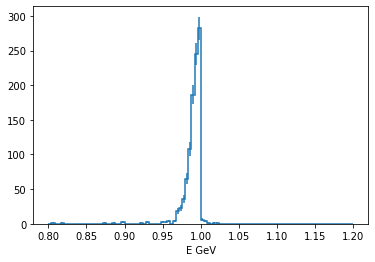

Energy = 1.5, mean = 1.4844594779242917, RMS = 1.4846456323586628, Sigma = 0.023509829484569974 sigma/Energy = 0.015835313809679827


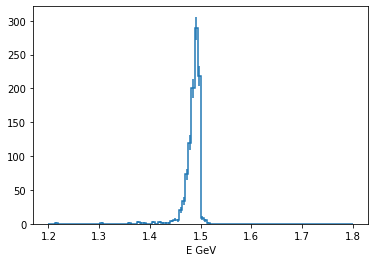

Energy = 2.0, mean = 1.9757134343719878, RMS = 1.9768763574825525, Sigma = 0.06779792043661267 sigma/Energy = 0.03429547840966126


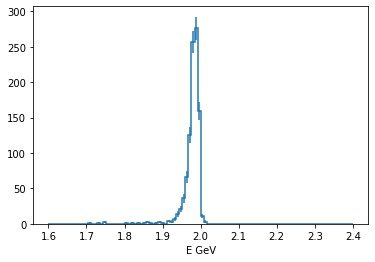

Energy = 2.5, mean = 2.4696449979133788, RMS = 2.4704608820163796, Sigma = 0.06348664311944745 sigma/Energy = 0.02569829928560938


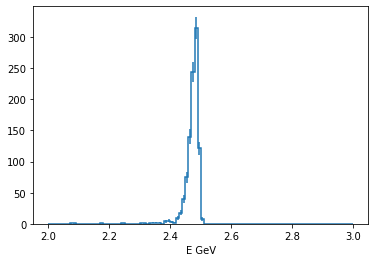

Energy = 3.0, mean = 2.96616385051647, RMS = 2.9663394993899965, Sigma = 0.032280606106485206 sigma/Energy = 0.010882303294388065


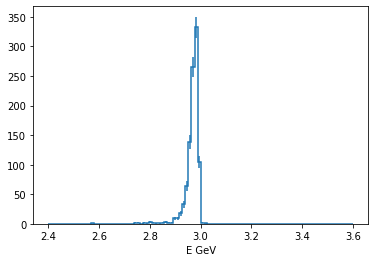

Energy = 3.5, mean = 3.457826508170825, RMS = 3.458141622688622, Sigma = 0.04668320857279289 sigma/Energy = 0.013499507442525684


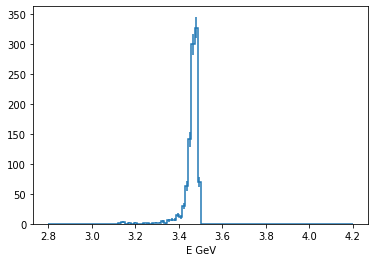

Energy = 4.0, mean = 3.9488079190078906, RMS = 3.9493386186615766, Sigma = 0.064742131817681 sigma/Energy = 0.01639315796112261


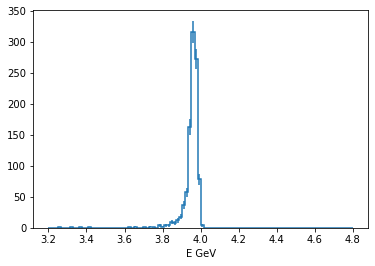

Energy = 4.5, mean = 4.4408849097893395, RMS = 4.441401040012531, Sigma = 0.06770831728616078 sigma/Energy = 0.015244810517261856


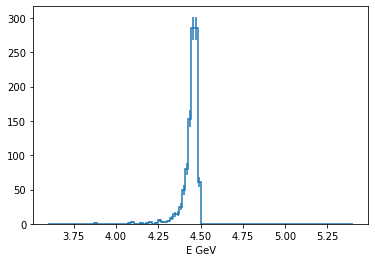

Energy = 5.0, mean = 4.934649759549607, RMS = 4.935198624111488, Sigma = 0.07360169841062669 sigma/Energy = 0.014913624357697991


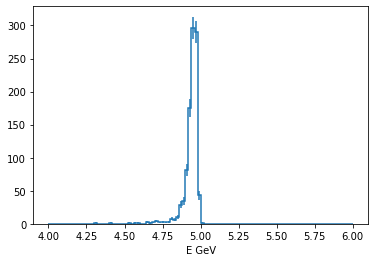

Energy = 5.5, mean = 5.427513082506093, RMS = 5.428035775608392, Sigma = 0.07532675825898522 sigma/Energy = 0.013877351103225244


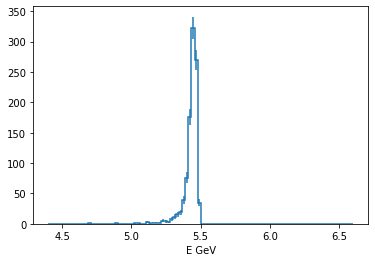

Energy = 6.0, mean = 5.920522419480004, RMS = 5.921169856536443, Sigma = 0.08755998167221206 sigma/Energy = 0.014787615250650792


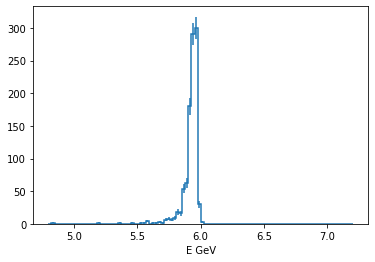

Energy = 6.5, mean = 6.406645725582153, RMS = 6.407968034248135, Sigma = 0.13017248106207138 sigma/Energy = 0.02031415892937501


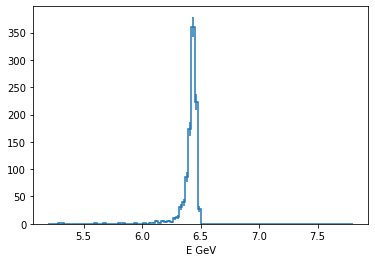

In [8]:
fit_input_data = []
true_energies = []
sigmas = []
sigma_div_e_vals = []
for true_energy, file_name in input_data:
    events_tree = uproot4.open(file_name)["events/EcalEndcapNHits/"]    
    edeps = events_tree['EcalEndcapNHits.energyDeposit'].array()
    energy_per_event = ak.sum(edeps, axis=-1)
    sigma = np.std(energy_per_event)
    mean = np.mean(energy_per_event)
    rms = np.sqrt(np.mean(energy_per_event**2))
    
    print(f"Energy = {true_energy}, mean = {mean}, RMS = {rms}, Sigma = {sigma} sigma/Energy = {sigma/rms}")
    sigma_div_e_vals.append(sigma/true_energy)
    sigmas.append(sigma)
    true_energies.append(true_energy)
    # noinspection PyTypeChecker
    h1_energies = Hist(hist.axis.Regular(100, true_energy - true_energy/5, true_energy + true_energy/5, name="E GeV"))
    h1_energies.fill(energy_per_event)
    h1_energies.plot()
    plt.show()

    fit_input_data.append([true_energy, h1_energies.to_numpy()])

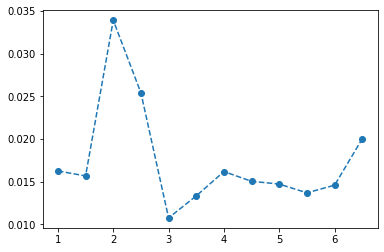

In [9]:
plt.plot(true_energies, sigma_div_e_vals, "o--")